In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
# for dirname, _, filenames in os.walk('/kaggle/input/food-101/food-101/food-101/images'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# /kaggle/input/food-101/food-101/food-101/meta

In [3]:
# !head '/kaggle/input/food-101/food-101/food-101/meta/train.txt'
train_df = pd.read_csv('/kaggle/input/food-101/food-101/food-101/meta/train.txt', header = None, names=['path'])
train_df.head()

,path
0,apple_pie/1005649
1,apple_pie/1014775
2,apple_pie/1026328
3,apple_pie/1028787
4,apple_pie/1043283


In [4]:
test_df = pd.read_csv('/kaggle/input/food-101/food-101/food-101/meta/test.txt', header = None, names=['path'])
test_df.head()

,path
0,apple_pie/1011328
1,apple_pie/101251
2,apple_pie/1034399
3,apple_pie/103801
4,apple_pie/1038694


In [5]:
def spliter(data, class_or_id='id'):
    if class_or_id.upper() == 'CLASS':
        output = data.split('/')[0]
        
    else:
        output = data.split('/')[-1]
    return output


In [6]:
train_df['label'] = train_df['path'].map(lambda x: spliter(data = x, class_or_id = 'Class'))
train_df['idx'] = train_df['path'].map(lambda x: spliter(x))
train_df.head()

,path,label,idx
0,apple_pie/1005649,apple_pie,1005649
1,apple_pie/1014775,apple_pie,1014775
2,apple_pie/1026328,apple_pie,1026328
3,apple_pie/1028787,apple_pie,1028787
4,apple_pie/1043283,apple_pie,1043283


In [7]:
test_df['label'] = test_df['path'].map(lambda x: spliter(x, 'class')) 
test_df['idx'] = test_df['path'].map(lambda x: spliter(x)) 
test_df.head()

,path,label,idx
0,apple_pie/1011328,apple_pie,1011328
1,apple_pie/101251,apple_pie,101251
2,apple_pie/1034399,apple_pie,1034399
3,apple_pie/103801,apple_pie,103801
4,apple_pie/1038694,apple_pie,1038694


In [8]:
food_21 = train_df['label'].unique()[:20]
food_21


array(['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio',
       'beef_tartare', 'beet_salad', 'beignets', 'bibimbap',
       'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad',
       'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake',
       'cheese_plate', 'chicken_curry', 'chicken_quesadilla'],
      dtype=object)

In [9]:
list_ = []
for f in food_21:
    list_.append(f.upper())
food_21 = [food.upper() for food in food_21]
food_21

['APPLE_PIE',
 'BABY_BACK_RIBS',
 'BAKLAVA',
 'BEEF_CARPACCIO',
 'BEEF_TARTARE',
 'BEET_SALAD',
 'BEIGNETS',
 'BIBIMBAP',
 'BREAD_PUDDING',
 'BREAKFAST_BURRITO',
 'BRUSCHETTA',
 'CAESAR_SALAD',
 'CANNOLI',
 'CAPRESE_SALAD',
 'CARROT_CAKE',
 'CEVICHE',
 'CHEESECAKE',
 'CHEESE_PLATE',
 'CHICKEN_CURRY',
 'CHICKEN_QUESADILLA']

In [10]:
def prepare_data(label):
    if label.upper() in food_21:
        return label
    else:
        return 'others'

In [11]:
train_df['label'] = train_df['label'].map(lambda x: prepare_data(x))
test_df['label'] = test_df['label'].map(lambda x: prepare_data(x))


In [12]:
train_df['label'].unique()

array(['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio',
       'beef_tartare', 'beet_salad', 'beignets', 'bibimbap',
       'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad',
       'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake',
       'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'others'],
      dtype=object)

In [13]:
def Adding_Path(path):
    return '/kaggle/input/food-101/food-101/food-101/images/'+path+'.jpg'


In [14]:
train_df['path'] = train_df[['path']].apply(Adding_Path, axis=1)
test_df['path'] = test_df[['path']].apply(Adding_Path, axis=1)
train_df.head()

,path,label,idx
0,/kaggle/input/food-101/food-101/food-101/image...,apple_pie,1005649
1,/kaggle/input/food-101/food-101/food-101/image...,apple_pie,1014775
2,/kaggle/input/food-101/food-101/food-101/image...,apple_pie,1026328
3,/kaggle/input/food-101/food-101/food-101/image...,apple_pie,1028787
4,/kaggle/input/food-101/food-101/food-101/image...,apple_pie,1043283


In [15]:
from matplotlib import pyplot as plt
test_images = plt.imread(test_df['path'].iloc[0])
test_images = test_images/255.
test_images.shape

(512, 512, 3)

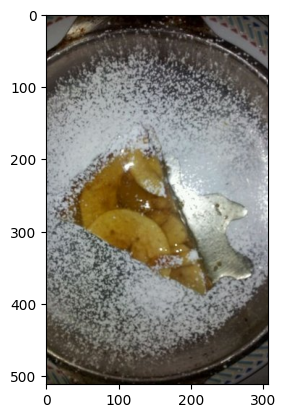

In [16]:
from matplotlib import pyplot as plt
train_images = plt.imread(train_df['path'].iloc[0])
plt.imshow(train_images)

## Augmentation

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [18]:
train_gen = datagen.flow_from_dataframe(dataframe = train_df, directory=None, x_col='path', y_col='label',
    weight_col=None, target_size=(256, 256), color_mode='rgb', 
    classes=None, class_mode='categorical', batch_size=32, shuffle=True)

Found 75750 validated image filenames belonging to 21 classes.


In [19]:

test_gen = ImageDataGenerator(rescale=1./255)
test_gen = test_gen.flow_from_dataframe(dataframe = test_df, directory=None, x_col='path', y_col='label',
    weight_col=None, target_size=(256, 256), color_mode='rgb',
    classes=None, class_mode='categorical', batch_size=32, shuffle=False)

Found 25250 validated image filenames belonging to 21 classes.


In [20]:
test_df.head()

,path,label,idx
0,/kaggle/input/food-101/food-101/food-101/image...,apple_pie,1011328
1,/kaggle/input/food-101/food-101/food-101/image...,apple_pie,101251
2,/kaggle/input/food-101/food-101/food-101/image...,apple_pie,1034399
3,/kaggle/input/food-101/food-101/food-101/image...,apple_pie,103801
4,/kaggle/input/food-101/food-101/food-101/image...,apple_pie,1038694


## Train

In [21]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.xception import Xception

inception = Xception(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(256,activation='relu')(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(21, activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

83683744/83683744 [==============================] - 3s 0us/step


In [22]:
history = model.fit(train_gen,
                    steps_per_epoch = len(train_gen) // 32,
                    epochs=110,
                    verbose=1)

Epoch 1/110
74/74 [==============================] - 93s 732ms/step - loss: 1.2638 - accuracy: 0.8032
Epoch 2/110
74/74 [==============================] - 54s 730ms/step - loss: 1.0883 - accuracy: 0.8108
Epoch 3/110
74/74 [==============================] - 54s 723ms/step - loss: 1.0616 - accuracy: 0.8150
Epoch 4/110
74/74 [==============================] - 58s 781ms/step - loss: 1.0517 - accuracy: 0.8057
Epoch 5/110
74/74 [==============================] - 53s 717ms/step - loss: 0.9941 - accuracy: 0.8087
Epoch 6/110
74/74 [==============================] - 54s 723ms/step - loss: 0.9573 - accuracy: 0.8226
Epoch 7/110
74/74 [==============================] - 53s 708ms/step - loss: 1.0272 - accuracy: 0.7965
Epoch 8/110
74/74 [==============================] - 52s 705ms/step - loss: 1.0095 - accuracy: 0.7990
Epoch 9/110
74/74 [==============================] - 52s 702ms/step - loss: 0.9476 - accuracy: 0.8074
Epoch 10/110
74/74 [==============================] - 52s 696ms/step - loss: 0.906

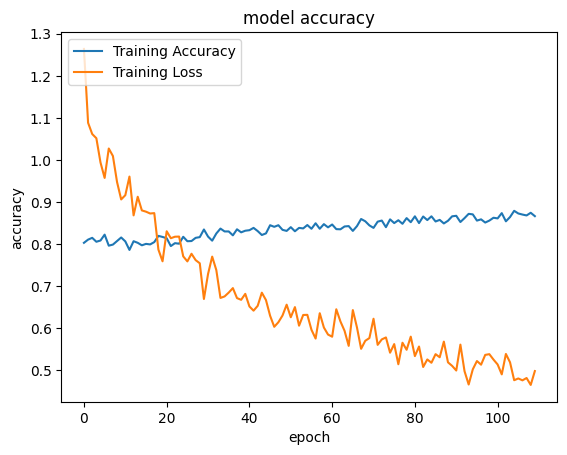

In [23]:
# Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Training Loss'], loc='upper left')
plt.show()

In [24]:
results = model.evaluate(test_gen, batch_size=32)
print(results)

790/790 [==============================] - 215s 271ms/step - loss: 0.6116 - accuracy: 0.8478
[0.6115691065788269, 0.8478019833564758]
